# KNN으로 포지션 예측하기

In [1]:
# Random값을 정하기
import numpy as np
np.random.seed(5)

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("../Data/basketball_train.csv")
test = pd.read_csv("../Data/basketball_test.csv")

In [4]:
train.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Marcus Smart,SG,1.2,3.9,0.4
2,Chris Andersen,C,0.0,2.6,0.6
3,Jodie Meeks,SG,1.6,2.1,0.1
4,Ian Mahinmi,C,0.0,4.8,0.8


In [9]:
print(train.shape)
print(train.count())
print(train.isnull().sum())

(80, 5)
Player    80
Pos       80
3P        80
TRB       80
BLK       80
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


In [18]:
# 최적의 k 찾기 (교차검증 - cross validation)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # 교차검증


In [19]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 점위를 3부터 절반까지 지정 (절반넘으면 말이 안됨)
max_k_range = train.shape[0] // 2
max_k_range 

40

In [20]:
# 최적의 k를 찾기 위한 범위 확인
k_list = []
for i in range(3,max_k_range, 2):
    k_list.append(i)

k_list


[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [21]:
# 점수 및 Train Data 정의
cross_validation_scores = []
x_train = train[['3P','BLK','TRB']]
y_train = train['Pos']

print(x_train.head())
print(y_train.head())

    3P  BLK  TRB
0  1.4  0.1  1.3
1  1.2  0.4  3.9
2  0.0  0.6  2.6
3  1.6  0.1  2.1
4  0.0  0.8  4.8
0    SG
1    SG
2     C
3    SG
4     C
Name: Pos, dtype: object


---


In [26]:
# 교차검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
cross_validation_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn, # 모델 이름 
        x_train,
        y_train,
        cv = 10, # cv:cross validation(교차검증 횟수)
        scoring='accuracy'
    )

    cross_validation_scores.append(scores.mean())

cross_validation_scores




[0.9125,
 0.9,
 0.9125,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.8875,
 0.8875,
 0.875,
 0.875,
 0.875,
 0.85,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8375]

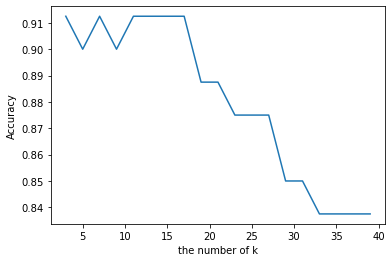

In [27]:
# k에 따른 정확도를 시각화
import matplotlib.pyplot as plt

plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')

plt.show()


In [29]:
# 가장 예측력이 높은 k를 산정
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k is",k)


The best number of k is 3


---
## 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=k)

In [34]:
# 학습에 사용할 features
x_train = train[['3P','BLK']]

In [35]:
# 학습에 사용할 target
y_train = train['Pos']

In [36]:
# 학습 시키기
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
# 검증에 사용할 featrures
x_test = test[['3P','BLK']]


In [38]:
# 검증의 정답
y_test = test['Pos']

In [39]:
knn.score(x_test,y_test)

0.95

In [43]:
# 예측
pred = knn.predict(x_test)
pred


array(['SG', 'SG', 'SG', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'SG', 'C', 'SG',
       'C', 'SG', 'C', 'C', 'C', 'SG', 'C', 'SG'], dtype=object)

In [45]:
# 실제값과 예측값의 비교
comparison = pd.DataFrame(
    {'예측값':pred,
     '정답': y_test
    }
)
comparison.head()

,예측값,정답
0,SG,SG
1,SG,SG
2,SG,SG
3,SG,SG
4,C,C


### Confusion matrix

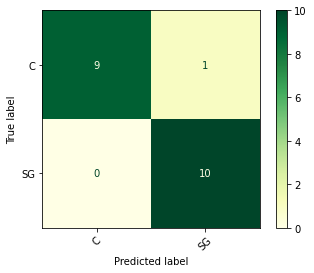

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix1 = confusion_matrix(y_test,pred)
target_names = ['C','SG']
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix1,
    display_labels=target_names
)
disp.plot(
    cmap = plt.cm.YlGn,
    xticks_rotation= 45
)

plt.show()


---
### 3개의 특징으로 예측하기 (3점슛,블로킹,리바운드)

In [60]:

x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

In [61]:
x_test = test[['3P','BLK','TRB']]
y_test = test[['Pos']]

In [62]:
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [66]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.95

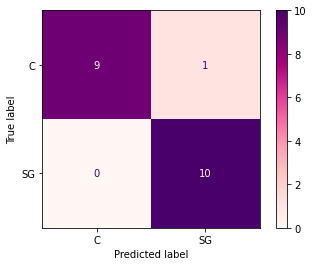

In [70]:
pred = knn.predict(x_test)
con1 = confusion_matrix(y_test, pred)
dis2 = ConfusionMatrixDisplay(
    con1,
    display_labels= target_names
)

dis2.plot(
    cmap = plt.cm.RdPu,
     
)

plt.show()

In [72]:
knn.predict([[3.4,0.5,3.7]])

array(['SG'], dtype=object)